# 1

#### En el ejemplo de teoría hemos visto la forma de entrenar utilizando un trozo de datos como en la imagen "way1.png". 

(Básicamente, tener en cuenta más datos de entrenamiento [[20% de test]])

Investiga la forma de realizar el ejercicio a partir del gif "way3_sliding_window.gif":

- ¿Da mejores resultados entrenar el modelo así?

Algo muy típico en el trabajo de data scientist

![](../rnn/sliding_windows_google.png)

In [156]:
import numpy as np
import pandas as pd
import itertools as it
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import Callback

In [157]:
N = 3000
t=np.arange(0,N)
x=(2*np.sin(0.02*t)*np.sin(0.003*t))+0.5*np.random.normal(size=N)
df = pd.DataFrame(x, columns=['Data'])
df.head()

,Data
0,0.533420
1,-0.585000
2,-0.154499
3,0.103695
4,0.610860


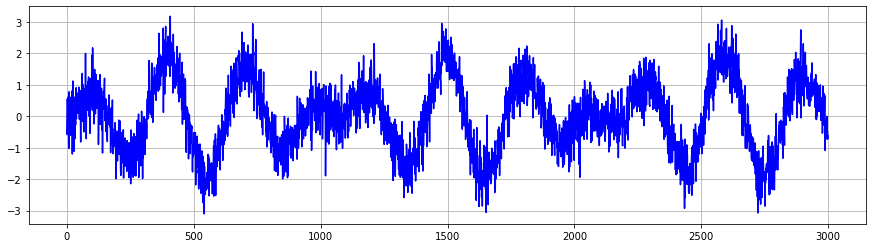

In [158]:
plt.figure(figsize=(15,4))
plt.plot(df,c='blue')
plt.grid(True)
plt.show()

In [159]:
Tp = 750

values = df.values
train, test = values[0:Tp ,:], values[Tp:N,:]

In [160]:
train = np.append(train, np.repeat(train[-1], step))
test = np.append(test, np.repeat(test[-1], step))

In [161]:
train[-8:]

array([ 0.734793  ,  0.68672387, -0.07444735,  1.01303327,  1.01303327,
        1.01303327,  1.01303327,  1.01303327])

In [162]:
def convert_to_matrix(data, step):
    x, y = [], []
    for i in range(len(data) - step):
        D = i + step
        x.append(data[i:D,])
        y.append(data[D,])
    return np.array(x), np.array(y)


In [163]:
x_train, y_train = convert_to_matrix(train, step= 4)
x_test, y_test = convert_to_matrix(test, step= 4)

x_train

array([[ 0.53342027, -0.5849997 , -0.15449939,  0.10369489],
       [-0.5849997 , -0.15449939,  0.10369489,  0.61085988],
       [-0.15449939,  0.10369489,  0.61085988,  0.55798263],
       ...,
       [ 0.68672387, -0.07444735,  1.01303327,  1.01303327],
       [-0.07444735,  1.01303327,  1.01303327,  1.01303327],
       [ 1.01303327,  1.01303327,  1.01303327,  1.01303327]])

In [164]:
x_train.shape

(750, 4)

In [165]:
x_test.shape

(2250, 4)

In [166]:
x_train[0]

array([ 0.53342027, -0.5849997 , -0.15449939,  0.10369489])

In [167]:
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [168]:
x_train.shape

(750, 1, 4)

In [169]:
def build_simple_rnn(num_units=128, embedding=4, num_dense=32,lr=0.001):
    """
    Builds and compiles a simple RNN model
    Arguments:
              num_units: Number of units of a the simple RNN layer
              embedding: Embedding length
              num_dense: Number of neurons in the dense layer followed by the RNN layer
              lr: Learning rate (uses RMSprop optimizer)
    Returns:
              A compiled Keras model.
    """
    model = Sequential()
    # Long short term memory
    model.add(LSTM(units=num_units, input_shape=(1,embedding), activation="relu"))
    model.add(Dense(num_dense, activation="relu"))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer=RMSprop(learning_rate=lr),metrics=['mse'])
    
    return model

In [170]:
batches = 4
Tp = 750

values = df.values

In [171]:
len(values) *0.2

600.0

In [172]:
x_train_list = []
y_train_list = []
x_test_list = []
y_test_list = []


for i in range(1,batches + 1):
    tp = int(len(values) * 0.2 * i)
    train, test = values[0:tp,:], values[tp:, :]
    train = np.append(train, np.repeat(train[-1], step))
    test = np.append(test, np.repeat(test[-1], step))
    x_train, y_train = convert_to_matrix(train, step= 4)
    x_test, y_test = convert_to_matrix(test, step= 4)
    x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
    x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))
    x_train_list.append(x_train)
    x_test_list.append(x_test)
    y_train_list.append(y_train)
    y_test_list.append(y_test)
    

    

    

In [173]:
len(y_train)

2400

In [174]:
len(x_train_list)

4

In [175]:
class MyCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if (epoch+1) % 50 == 0 and epoch>0:
            print("Epoch number {} done".format(epoch+1))

In [176]:
model = build_simple_rnn()

In [177]:
num_epochs = 500
batch_size = 16

In [178]:
for i in range(len(x_train_list)):
    model.fit(x_train_list[i], y_train_list[i],epochs=num_epochs, 
          batch_size=batch_size, 
          callbacks=[MyCallback()],verbose=0)

Epoch number 50 done
Epoch number 100 done
Epoch number 150 done
Epoch number 200 done
Epoch number 250 done
Epoch number 300 done
Epoch number 350 done
Epoch number 400 done
Epoch number 450 done
Epoch number 500 done
Epoch number 50 done
Epoch number 100 done
Epoch number 150 done
Epoch number 200 done
Epoch number 250 done
Epoch number 300 done
Epoch number 350 done
Epoch number 400 done
Epoch number 450 done
Epoch number 500 done
Epoch number 50 done
Epoch number 100 done
Epoch number 150 done
Epoch number 200 done
Epoch number 250 done
Epoch number 300 done
Epoch number 350 done
Epoch number 400 done
Epoch number 450 done
Epoch number 500 done
Epoch number 50 done
Epoch number 100 done
Epoch number 150 done
Epoch number 200 done
Epoch number 250 done
Epoch number 300 done
Epoch number 350 done
Epoch number 400 done
Epoch number 450 done
Epoch number 500 done


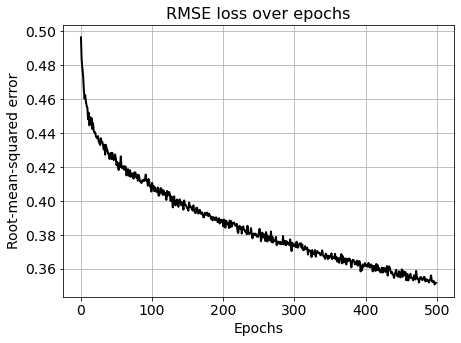

In [179]:
plt.figure(figsize=(7,5))
plt.title("RMSE loss over epochs",fontsize=16)
plt.plot(np.sqrt(model.history.history['loss']),c='k',lw=2)
plt.grid(True)
plt.xlabel("Epochs",fontsize=14)
plt.ylabel("Root-mean-squared error",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

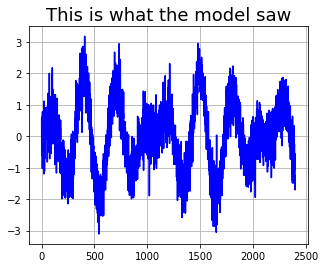

In [180]:
plt.figure(figsize=(5,4))
plt.title("This is what the model saw",fontsize=18)
plt.plot(x_train[:,0][:,0],c='blue')
plt.grid(True)
plt.show()

In [181]:
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)
predicted = np.concatenate((trainPredict,testPredict),axis=0)

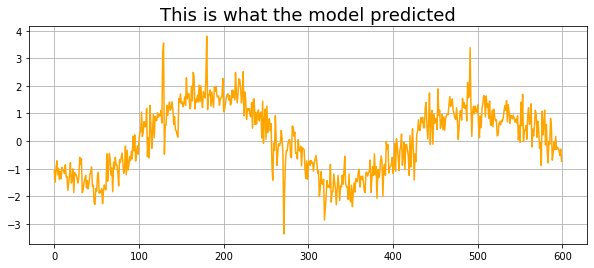

In [182]:
plt.figure(figsize=(10,4))
plt.title("This is what the model predicted",fontsize=18)
plt.plot(testPredict,c='orange')
plt.grid(True)
plt.show()

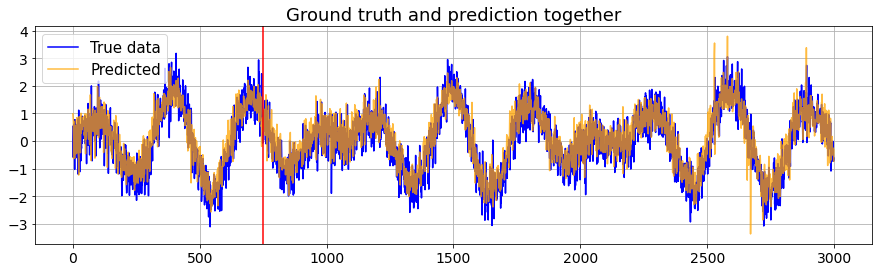

In [191]:
index = df.index.values
plt.figure(figsize=(15,4))
plt.title("Ground truth and prediction together",fontsize=18)
plt.plot(index,df,c='blue')
plt.plot(index,predicted,c='orange',alpha=0.75)
plt.legend(['True data','Predicted'],fontsize=15)
plt.axvline(df.index[Tp], c="r")
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()